# `disc` demo - Kaggle house price dataset

### Import useful libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install diver

    100% |████████████████████████████████| 296kB 4.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for diver ... done
  Stored in directory: /Users/TomWalker/Library/Caches/pip/wheels/51/cf/0d/ba67929fe97d36aa06795dc94fffb644be03543ad9eb9a9d2f
Successfully built diver
You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Load in dataset

In [3]:
input_dir = './kaggle-house-prices/'

### Data Description

The following comes from the .txt file within the Kaggle data.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


### Load in data

In [4]:
df_train = pd.read_csv(input_dir + 'train_ts.csv')

In [5]:
df_test = pd.read_csv(input_dir + 'test_ts.csv')

In [6]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [7]:
df_train.head(3).style

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,DateSold
0,0,1,60,RL,65,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003-01-01,2003-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,WD,Normal,208500,2008-02-01
1,1,2,20,RL,80,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976-01-01,1976-01-01,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,WD,Normal,181500,2007-05-01
2,2,3,60,RL,68,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-01-01,2002-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,WD,Normal,223500,2008-09-01


In [8]:
df_test.head(3).style

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,DateSold
0,0,1461,20,RH,80,11622,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961-01-01,1961-01-01,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,nan,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,nan,MnPrv,nan,0,WD,Normal,2010-06-01
1,1,1462,20,RL,81,14267,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958-01-01,1958-01-01,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,nan,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,nan,nan,Gar2,12500,WD,Normal,2010-06-01
2,2,1463,60,RL,74,13830,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997-01-01,1998-01-01,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,nan,MnPrv,nan,0,WD,Normal,2010-03-01


`df_train` is one column more than `df_test` as it includes the dependent/target variable `SalePrice` as the final column.

Split the target off from the training features

In [9]:
y_train = df_train.SalePrice

In [10]:
df_train = df_train.drop(labels='SalePrice', axis=1)

In [11]:
df_train.shape, y_train.shape

((1460, 80), (1460,))

## Dataset inspection 

An early step in a Data Science project is investigating features for common issues.

`disc` module `dataset inspector` can check for the following issues:
- high cardinality of categorical features (number of unique categories - a high number can cause issues for various machine learning models)
- missing data (a large proportion of missing values for a given feature can also cause issues)
- features with a single value, which are useless in training the model

In [13]:
import

ModuleNotFoundError: No module named 'diver'

In [12]:
from diver.dataset_inspector import infer_useful_cols, \
    categorical_excess_cardinality_flagger_and_reducer, \
    excess_missing_data_flagger_and_cutter, \
    zero_variance_flagger_and_cutter, \
    inspect_and_clean

ModuleNotFoundError: No module named 'diver'

### Setup

Functions in the `disc` modules depend on a lookup table - `useful_cols` - being defined which specifies the subset of features within the input dataframe deemed to be useful, alongside the data-type each feature should be, and how to fill in any missing values.

There are two ways to generate the table:
- A) Manually: encourages close inspection and understanding of the dataset, which are useful and what data-types each one should be (e.g. a feature may be all numeric but actually be a nominal column; for some columns NaNs can be understood as zeros, elsewhere they should be filled with the column mean or otherwise)
- B) Automatically: If the set of available features is very large and all are considered potentially useful, it is possible to generate this table automatically from the input dataframe. This will come at the cost of less understanding of each feature, and less flexibility with fill methods

Both methods are illustrated below.

#### A) Manually define the `useful_cols` lookup table

Most functions within `disc` depend upon the table below to be defined.

`useful_cols` is a lookup table of all useful features to be used for modelling within the input dataset alongside the following information:
- The (desired) data-type of the feature - the allowable data-types are currently {`numeric`, `nominal`, `timestamp`, `bool`}
- If there are missing values, the method with which to fill them
    - For `numeric` dtype, the methods currently available are {`mean` or `zeros`}
    - For `boolean` dtype, the methods currently available are {`zeros`}
    - For `nominal` and `timestamp` dtype, the methods currently available are {`skip`} (skip the NaN-filling step - this is a placeholder as no fill methods currently exist)

In [13]:
useful_cols = pd.DataFrame(
    data = [
#         ['Id'], 
        ['MSSubClass', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['MSZoning', 'nominal', 'skip'], 
        ['LotFrontage', 'numeric', 'mean'], 
        ['LotArea', 'numeric', 'mean'], 
        ['Street', 'nominal', 'skip'],
        ['Alley', 'nominal', 'skip'], 
        ['LotShape', 'nominal', 'skip'], 
        ['LandContour', 'nominal', 'skip'], 
        ['Utilities', 'nominal', 'skip'], 
        ['LotConfig', 'nominal', 'skip'],
        ['LandSlope', 'nominal', 'skip'], 
        ['Neighborhood', 'nominal', 'skip'], 
        ['Condition1', 'nominal', 'skip'], 
        ['Condition2', 'nominal', 'skip'], 
        ['BldgType', 'nominal', 'skip'],
        ['HouseStyle', 'nominal', 'skip'],  # Actually ordinal - to be updated when ordinal dtype covered or manual feature engineering
        ['OverallQual', 'numeric', 'mean'], 
        ['OverallCond', 'numeric', 'mean'], 
        ['YearBuilt', 'timestamp', 'skip'], # Date - implement timestamp encoding / manual feature engineering e.g. age today
        ['YearRemodAdd', 'timestamp', 'skip'], # Date - implement timestamp encoding / manual feature engineering e.g. age today
        ['RoofStyle', 'nominal', 'skip'], 
        ['RoofMatl', 'nominal', 'skip'], 
        ['Exterior1st', 'nominal', 'skip'], 
        ['Exterior2nd', 'nominal', 'skip'], 
        ['MasVnrType', 'nominal', 'skip'],
        ['MasVnrArea', 'numeric', 'mean'], 
        ['ExterQual', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['ExterCond', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['Foundation', 'nominal', 'skip'], 
        ['BsmtQual', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['BsmtCond', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['BsmtExposure', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['BsmtFinType1', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['BsmtFinSF1', 'numeric', 'mean'],
        ['BsmtFinType2', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['BsmtFinSF2', 'numeric', 'mean'],
        ['BsmtUnfSF', 'numeric', 'mean'],
        ['TotalBsmtSF', 'numeric', 'mean'],
        ['Heating', 'nominal', 'skip'],
        ['HeatingQC', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['CentralAir', 'bool', 'zeros'], # Yes/No to be incorporated into Boolean converter 
        ['Electrical', 'nominal', 'skip'], 
        ['1stFlrSF', 'numeric', 'mean'], 
        ['2ndFlrSF', 'numeric', 'mean'],
        ['LowQualFinSF', 'numeric', 'mean'], 
        ['GrLivArea', 'numeric', 'mean'], 
        ['BsmtFullBath', 'numeric', 'mean'], 
        ['BsmtHalfBath', 'numeric', 'mean'], 
        ['FullBath', 'numeric', 'mean'],
        ['HalfBath', 'numeric', 'mean'], 
        ['BedroomAbvGr', 'numeric', 'mean'],
        ['KitchenAbvGr', 'numeric', 'mean'],
        ['KitchenQual', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['TotRmsAbvGrd', 'numeric', 'mean'],
        ['Functional', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['Fireplaces', 'numeric', 'mean'],
        ['FireplaceQu', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['GarageType', 'nominal', 'skip'],
        ['GarageYrBlt', 'numeric', 'mean'], # Date - implement timestamp encoding / manual feature engineering e.g. age today
        ['GarageFinish', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['GarageCars', 'numeric', 'mean'],
        ['GarageArea', 'numeric', 'mean'],
        ['GarageQual', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['GarageCond', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['PavedDrive', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['WoodDeckSF', 'numeric', 'mean'],
        ['OpenPorchSF', 'numeric', 'mean'],
        ['EnclosedPorch', 'numeric', 'mean'],
        ['3SsnPorch', 'numeric', 'mean'],
        ['ScreenPorch', 'numeric', 'mean'],
        ['PoolArea', 'numeric', 'mean'],
        ['PoolQC', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['Fence', 'nominal', 'skip'], # Actually ordinal - to be updated when ordinal dtype covered
        ['MiscFeature', 'nominal', 'skip'],
        ['MiscVal', 'numeric', 'zeros'], 
        ['DateSold', 'timestamp', 'skip'], # Date - implement timestamp encoding / manual feature engineering e.g. age today
        ['SaleType', 'nominal', 'skip'],
        ['SaleCondition', 'nominal', 'skip'],
    ],
    columns=[
        'feature',
        'dtype',
        'fillna',
    ]
)

In [14]:
useful_cols.head(5)

,feature,dtype,fillna
0,MSSubClass,nominal,skip
1,MSZoning,nominal,skip
2,LotFrontage,numeric,mean
3,LotArea,numeric,mean
4,Street,nominal,skip


#### B - Auto-generate `useful_cols`

In [15]:
useful_cols_auto = infer_useful_cols(
    df_train,
    fill_methods={'numeric': 'mean', 'nominal': 'skip', 'bool': 'zeros', 'timestamp': 'skip'}
)

The following columns contain both numeric and non-numeric elements; as such they have been flagged as nominal dtype, alongside features with non-numeric elements only: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [16]:
useful_cols_auto.head(5)

,feature,dtype,fillna
0,Unnamed: 0,numeric,mean
1,Id,numeric,mean
2,MSSubClass,numeric,mean
3,LotFrontage,numeric,mean
4,LotArea,numeric,mean


#### Comparison between manual and auto-specification of `useful_cols`

Just as an aside, the following section illustrates the differences in the two approaches above

In [17]:
# Get a combined useful_cols table with dtype and fill method specifications from both the manual and 
# auto methods above
useful_cols_manual_auto = pd.merge(useful_cols, useful_cols_auto, how='outer', on='feature')

In [18]:
useful_cols_manual_auto.head(5)

,feature,dtype_x,fillna_x,dtype_y,fillna_y
0,MSSubClass,nominal,skip,numeric,mean
1,MSZoning,nominal,skip,nominal,skip
2,LotFrontage,numeric,mean,numeric,mean
3,LotArea,numeric,mean,numeric,mean
4,Street,nominal,skip,nominal,skip


Look at instances where the manual- and auto-generated `useful_cols` tables differ

In [19]:
useful_cols_manual_auto[(useful_cols_manual_auto['dtype_x'] != useful_cols_manual_auto['dtype_y']) | (useful_cols_manual_auto['fillna_x'] != useful_cols_manual_auto['fillna_y'])]

,feature,dtype_x,fillna_x,dtype_y,fillna_y
0,MSSubClass,nominal,skip,numeric,mean
18,YearBuilt,timestamp,skip,nominal,skip
19,YearRemodAdd,timestamp,skip,nominal,skip
40,CentralAir,bool,zeros,nominal,skip
74,MiscVal,numeric,zeros,numeric,mean
75,DateSold,timestamp,skip,nominal,skip
78,Unnamed: 0,NaN,NaN,numeric,mean
79,Id,NaN,NaN,numeric,mean


The above table shows `useful_cols` inputs for both manual generation (`_x`) and auto generation (`_y`).

Going through a few of them:
- `MSSubClass` is an **ordinal** feature. As this is not currently a covered dtype, this was input manually as **nominal** although in fact, treating the categories as **numeric** is probably best for this feature, as the auto-generator has detected
- `MiscVal` is linked to `MiscFeature`, whereby the `NaNs` in the former correlate with a **no feature** category in the latter. For this reason, the fill method was manually chosen to be `zeros`, while in the auto-generator, it was specified as for all the other numeric columns as `mean`
- `Id` is a useless column so ignored in the manual method; automatically picked up with the auto method

### Dataset inspection

Once `useful_cols` is defined, all other `disc` methods are automatic.

The next stage below performs a few checks on the dataset for issues which commonly cause problems in model training

#### 1) Inspect cardinality of categorical columns

**Cardinality** is the number of unique sets within a categorical feature.

`categorical_excess_cardinality_flagger_and_reducer` returns three pieces of information on the categorical columns:
- A list of counts of unique sets for each categorical feature
- The same list expressed as a proportion of the number of samples in the dataset (`cardinality_fractions` below)
- A list of features which exceed given cardinality thresholds (these are inputs to the function and can be given as thresholds on absolute count, or fraction, or both)

If specified, this function can reduce the cardinality of features where it is deemed unacceptably high to a specified maximum number of categories.

In [20]:
cardinality_counts, cardinality_fractions, excess_cardinality_features = \
    categorical_excess_cardinality_flagger_and_reducer(
        df_train, 
        useful_cols, 
        cardinality_max_categories_threshold=20, 
        cardinality_fraction_threshold=0.1, 
        reducer=False
)

Following features exceed cardiality fraction threshold of 0.1: set()
Following features exceed cardiality absolute number threshold of 20: {'Neighborhood'}


In [21]:
cardinality_counts.sort_values(ascending=False).head(5)

Neighborhood    25
Exterior2nd     16
MSSubClass      15
Exterior1st     15
Condition1       9
dtype: int64

In [22]:
cardinality_fractions.sort_values(ascending=False).head(5)

Neighborhood    0.017123
Exterior2nd     0.010959
MSSubClass      0.010274
Exterior1st     0.010274
Condition1      0.006164
dtype: float64

In [23]:
excess_cardinality_features

['Neighborhood']

In [ ]:
cardinality_counts

#### 2) Inspect missing values in data

Excess missing values can cause issues while training machine learning models.

The following function allows a threshold to be set (`nan fraction` e.g. the proportion of a feature which is missing) beyond which the feature will be deemed unacceptably incomplete.

If specified, it can cut these features from the input dataset.

In [24]:
null_counts, null_count_fraction, excess_null_features, _ = \
    excess_missing_data_flagger_and_cutter(
        df_train, 
        useful_cols, 
        nan_fraction_threshold=0.15, 
        cutter=False
    )

In [25]:
null_counts.sort_values(ascending=False).head(5)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [26]:
null_count_fraction.sort_values(ascending=False).head(5)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

In [27]:
excess_null_features

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

#### 3) Check for any features with only one value (zero variance)

Sometimes in DS projects, features in the raw input dataset can be included which consist of only one value (zero variance).

This function checks for such features and, if specified, cuts them from the dataset.

In [28]:
zero_variance_features, _ = zero_variance_flagger_and_cutter(df_train, useful_cols, cutter=False)

In [29]:
zero_variance_features

[]

#### One-shot dataset inspection and cleaning

The following function performs **steps 1, 2 and 3** above, transforming the input dataframe and `useful_cols` lookup where necessary.

In [30]:
df_train, useful_cols, report = inspect_and_clean(
    df_train, 
    useful_cols, 
    cardinality_args={
        'cardinality_fraction_threshold': 0.05, 
        'cardinality_max_categories_threshold': 20, 
        'reducer_max_categories': 10   # Where features exceed above thresholds, reduce cardinality down to this number
    },
    nan_fraction_threshold=0.15,
    reduce_and_cull=True
)

Following features exceed cardiality fraction threshold of 0.05: set()
Following features exceed cardiality absolute number threshold of 20: {'Neighborhood'}
Features ['Neighborhood'] exceeded thresholds and have each been reduced down to a maximum 10 categories per feature
Following features dropped for having a null count density greater than 0.15: ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] and have been dropped
Following features dropped for having zero variance: []


In [31]:
report.keys()

dict_keys(['cardinality_pre', 'cardinality_fraction_pre', 'excess_cardinality_features', 'null_count_pre', 'null_fraction_pre', 'excess_nulls_features', 'zero_variance_features'])

### Encode features

The `disc` module `dataset_conditioner` performs multiple feature encodings in one shot.

`FullEncoder` is formatted as with SciKit-Learn classes with the following methods:
- `encoder.fit_transform()` calculates the various encoding attributes (yellow blocks in the diagram below) while encoding the train set data
- `encoder.transform()` uses the encoded attributes calculated at the previous step to encode the test set data

The flow diagram below shows all the encoding steps.

The `useful_cols` lookup table dictates how missing values are filled in, and what data-type each feature should be considered to be

![dataset_encoder flow](../pictures/readme_flow.png)

In [32]:
from dataset_conditioner import FullEncoder

In [33]:
# coding: utf-8

# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler    # Demean and rescale numerical columns
# For saving and loading FullEncoder object
import pickle
from joblib import dump, load
# For checking for nans, used in boolean_mapper
from math import isnan
from _shared import _get_boolean_elements


#############
## PRIVATE ##
#############

# Define individual encoding functions


def _missing_value_conditioner(features, useful_cols, mode='fit_transform', **kwargs):
    '''
    Function looks for missing values (NaNs) in the dataframe `features`, and deals with them as specified in the lookup table `useful_cols`.
    
    At the moment, methods for dealing with missing values are:
    - (Numeric dtype)
        - 'mean': fill with the mean value of the column
        - 'zeros': fill with zeros
    - (Nominal dtype)
        - TO DO
    - (All types)
        - 'skip': ignore this column for the missing values conditioner
        
    Parameters
    ----------
    features : pandas.DataFrame
        Main data science project input dataframe, which could include some missing values
    useful_cols : pandas.DataFrame
        Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with missing values for each feature
    mode : str
        One of {'fit_transform', 'transform'}. Default = 'fit_transform. If 'transform', the feature means generated from the 'fit_transform' stage must be included as a kwarg
    **kwargs
        {'means': means} If mode is 'transform'
    
    Raises
    ------
    ValueError
        ValueError when set of 'fillna' methods in `useful_cols` contains a method not recognised
    ValueError
        ValueError when `mode` argument not recognised
    
    Returns
    -------
    features : pandas.DataFrame
        Input dataframe with missing values filled as specified
    means : pandas.Series
        Series of {feature: feature_mean} for all features specified to be filled with the feature mean, as calculated at the 'fit_transform' stage
    
    '''
    
    ## Get DataFrame containing features with some NaNs, and how to deal with them joined on from the `useful_cols` df
    # Get counts of NaN values in each column
    features_nan_counts = pd.DataFrame(features.isna().sum()).reset_index()
    # Rename columns in resulting DataFrame
    features_nan_counts.rename(mapper={'index': 'feature', 0: 'nan_count'}, axis=1, inplace=True)
    # Join on how to deal with nans from the `useful_cols` df
    features_nan_counts = pd.merge(features_nan_counts, useful_cols, on='feature')
    
    # Get set of fill types
    fill_types = set(features_nan_counts['fillna'].values)
    
    for fill_type in fill_types:
        if fill_type == 'skip':
            pass
        
        elif fill_type == 'mean':
            # Get list of columns to be filled in a given way
            feats_mean_filled = list(
                features_nan_counts['feature'][features_nan_counts['fillna'] == 'mean'].values
            )
            # Get slice of main `features` df for these features
            features_with_nans = features[feats_mean_filled]
            # Whether to calculate feature means, or use pre-calculated ones, is determined by the `mode` input parameter
            if mode == 'fit_transform':
                # Get the means of each feature
                means = features_with_nans.mean()
            elif mode == 'transform':
                # Use pre-calculated means from a previous `fit_transform` stage
                means = kwargs['means']
            else:
                raise ValueError(
                    '''`Mode` argument "{}" not supported. Needs to be one of ('fit_transform', 'transform')
                    '''.format(mode).replace('\n',' ')
                )
            # Get the locations of NaNs
            idx_nans = features_with_nans.isna()
            # Initialise copy dataframe
            features_without_nans = pd.DataFrame(index=features_with_nans.index)
            # Iterate over columns and replace NaNs for each with the column average
            for name, column in features_with_nans.iteritems():
                # Change NaNs to the mean value
                column[idx_nans[name]] = means[name]
            # Overwrite the original features (with nans), with the new copy with nans filled
            features.loc[:,feats_mean_filled] = features_with_nans
        
        elif fill_type == 'zeros':
            # Get list of columns to be filled in a given way
            feats_zeros_filled = list(features_nan_counts['feature'][features_nan_counts['fillna'] == 'zeros'].values)
            # Get slice of main `features` df for these features
            features_with_nans_zeros = features[feats_zeros_filled]
            # Fill all NaN locations with zeros
            features_with_nans_zeros.fillna(value=0, inplace=True)
            # Overwrite the original features (with nans), with the new copy with nans filled
            features.loc[:,feats_zeros_filled] = features_with_nans_zeros
            
        else:
            raise ValueError(
                '''Currently, `_missing_value_conditioner` is programmed to deal with only dtype 'numeric' and only
                with fill methods 'mean' and 'zeros'. The full set of fill types specified in input `useful_cols`
                is {}
                '''.format(fill_types).replace('\n',' ')
            )

        # If no columns specified as to be filled by mode='means', there will currently be no means parameter to return
        # This line catches this eventuality and assigns a dummy value
        try:
            means
        except NameError:
            means = None
    
    return features, means


def _numeric_encoder(features, useful_cols, mode='fit_transform', **kwargs):
    '''
    Function standardises features by removing the mean and scaling to unit variance, using the SkLearn Standard Scaler
        
    Parameters
    ----------
    features : pandas.DataFrame
        Main data science project input dataframe, which could include some missing values
    useful_cols : pandas.DataFrame
        Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with missing values for each feature
    mode : str
        One of {'fit_transform', 'transform'}. Default = 'fit_transform. If 'transform', the StandardScaler object generated from the 'fit_transform' stage must be included as a kwarg
    **kwargs
        {'scaler': scaler} If mode is 'transform'
    
    Raises
    ------
    ValueError
        ValueError when `mode` argument not recognised    
    
    Returns
    -------
    numeric_features_transformed : pandas.DataFrame
        Dataframe of transformed features
    scaler : SkLearn StandardScaler object
        StandardScaler object storing the fitted means and variances, for use when encoding test sets
        
    '''
    
    # Get list of numeric columns
    numeric_cols = useful_cols.loc[useful_cols.dtype == 'numeric', 'feature'].values
    # Select these columns from the main features dataframe
    numeric_features = features[numeric_cols]
    
    if mode == 'fit_transform':
        # Instantiate sklearn demean/rescaler
        scaler = StandardScaler()
        # Fit sklearn demean/rescaler
        numeric_features_transformed = scaler.fit_transform(numeric_features)
        
    elif mode == 'transform':
        # Load scaler included in the kwargs (already fitted in the previous 'fit_transform' stage)
        scaler = kwargs['scaler']
        # Transform numeric features using previous sklearn demean/rescaler
        numeric_features_transformed = scaler.transform(numeric_features)    
        
    else:
        raise ValueError(
            '''`Mode` argument "{}" not supported. Needs to be one of ('fit_transform', 'transform')
            '''.format(mode).replace('\n',' ')
        )

    # sklearn outputs NumPy array - reconvert to pandas DataFrame
    numeric_features_transformed = pd.DataFrame(
        numeric_features_transformed, 
        index=numeric_features.index,
        columns=numeric_features.columns,
    )
    
    return numeric_features_transformed, scaler


def _numeric_selector(features, useful_cols):
    '''
    Function skips numeric encoding and just selects the numeric features as specified in useful_cols
        
    Parameters
    ----------
    features : pandas.DataFrame
        Main data science project input dataframe, which could include some missing values
    useful_cols : pandas.DataFrame
        Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with missing values for each feature
    
    Raises
    ------
    
    Returns
    -------
    numeric_features_transformed : pandas.DataFrame
        Dataframe of transformed features
        
    '''
    
    # Get list of numeric columns
    numeric_cols = useful_cols.loc[useful_cols.dtype == 'numeric', 'feature'].values
    
    # Select these columns from the main features dataframe
    numeric_features = features[numeric_cols]

    return numeric_features


def _nominal_encoder(features, useful_cols, mode='fit_transform', **kwargs):
    '''
    Function one-hot-encodes nominal features
        
    Parameters
    ----------
    features : pandas.DataFrame
        Main data science project input dataframe, which could include some missing values
    useful_cols : pandas.DataFrame
        Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with
        missing values for each feature
    mode : str
        One of {'fit_transform', 'transform'}. Default = 'fit_transform. If 'transform', the function will calculate the set difference between train and test one-hot-encoded categories (train set = `cat_cols`). 
            - Train set categories missing in the test set will be added on as columns of zeros
            - Test set categories missing in the train set will be dropped
            - Test set categories will finally be sorted in the same order as train set
    **kwargs
        {'cat_cols': cat_cols} If mode is 'transform'
    
    Raises
    ------
    ValueError
        ValueError when `mode` argument not recognised     
    
    Returns
    -------
    nominal_features_transformed : pandas.DataFrame
        Dataframe of transformed features
    cat_cols : list
        List of the categorical columns to ensure future encoded test sets contain the same ordered list of 
        categories
    '''
    
    # Get list of nominal columns
    nominal_cols = useful_cols.loc[useful_cols.dtype == 'nominal', 'feature'].values

    # Select these columns from the main features dataframe
    nominal_features = features[nominal_cols]
    
    # If there are no nominal columns, skip the later steps
    if len(nominal_cols) == 0:
        nominal_features_transformed = nominal_features
        cat_cols = []
        
    # If there are some nominal columns:    
    elif len(nominal_cols) > 0:


        # Use pandas `get_dummies` method to one-hot-encode these columns
        nominal_features_transformed = pd.get_dummies(nominal_features)

        if mode == 'fit_transform':

            # Store transformed one-hot category columns for use later with the test set
            cat_cols = list(nominal_features_transformed.columns)

        elif mode == 'transform':

            # Load 'fit_transform' stage categorical columns
            cat_cols = kwargs['cat_cols']

            # Test set columns
            test_cat_cols = list(nominal_features_transformed.columns)

            # Train set categories missing in the test set
            missing_test_cols = set(cat_cols) - set(test_cat_cols)

            print('missing_test_cols: {}'.format(missing_test_cols))

            # Test set categories missing in the train set
            extra_test_cols = set(test_cat_cols) - set(cat_cols)

            print('extra_test_cols: {}'.format(extra_test_cols))

            # Remove extra cols
            nominal_features_transformed.drop(extra_test_cols, axis=1, inplace=True)

            # Add in missing cols as all zeros
            for col in missing_test_cols:
                nominal_features_transformed[col] = 0


            print('set difference after sorting: {}'.format(set(cat_cols) - set(nominal_features_transformed.columns)))

            # Sort columns in same order as train set
            nominal_features_transformed = nominal_features_transformed[cat_cols]

            # Check columns are now identical between train and test sets
            print('Test set cols in same order as train set: {}'.format(
                cat_cols == list(nominal_features_transformed.columns)))

        else:
            raise ValueError(
                '''`Mode` argument "{}" not supported. Needs to be one of ('fit_transform', 'transform')
                '''.format(mode).replace('\n',' ')
            )
        
    return nominal_features_transformed, cat_cols


def _weekend_flagger(timestamp):
    '''Given a timestamp, returns 1 if it is a Saturday or Sunday, 0 otherwise'''
    return timestamp.weekday() == 6 or timestamp.weekday() == 7


def _timestamp_transformer(timestamps, time_of_day_in='seconds', year_normalised=True):
    
    '''
    Function which takes in a Pandas Series of timestamps and returns useful features derived from the timestamp:
    - Time of day 
    - Day of week
    - Month of year
    - Year
    - Flag if it is a weekend (boolean)

    All but the year column are cyclical, so are further decomposed into sin and cos transforms of the original, \
    so that e.g. 11.59pm is considered close to 00.00am, and Sunday and Monday, and December and January \
    are considered close together

    Parameters
    ----------
    timestamps : pandas.Series
        Series of timestamp data
    time_of_day_in : str
        One of ['seconds', 'hours'] - specifies whether time of day is computed in hours (24) or seconds (24*60*60)
    year_normalised : bool
        Specifies whether the non-cyclical `year` column should be demeaned and rescaled or not

    Returns
    -------
    timestamps_transformed : pandas.DataFrame
        df of the above encodings of the timestamps Series passed in
        
    '''
    
    # Ensure input timestamps are in timestamp/datetime format and not string format
    timestamps = pd.to_datetime(timestamps)
    
    # Split timestamps in timestamps series into a pandas DataFrame of component timestamp parts
    timestamps_transformed = timestamps.apply(
        lambda x: {
            'day_of_week': x.weekday(),
            'day_of_month': x.day, 
            'month_of_year': x.month, 
            'year': x.year, 
            'hour_of_day': x.hour, 
            'minute_of_hour': x.minute, 
            'second_of_minute': x.second,
            'is_weekend': _weekend_flagger(x)}
    )

    timestamps_transformed = pd.DataFrame(list(timestamps_transformed))

    # Get second of day 
    timestamps_transformed['second_of_day'] = timestamps_transformed['hour_of_day']*60*60 + timestamps_transformed['minute_of_hour']*60 + timestamps_transformed['second_of_minute']

    # Define constants
    seconds_in_day = 24*60*60
    weekdays_in_week = 7
    months_in_year = 12
    hours_in_day = 24

    # Circular transform of second of day
    timestamps_transformed['sin_second_of_day'] = timestamps_transformed['second_of_day'].apply(lambda x: np.sin(2*np.pi*x / seconds_in_day))
    timestamps_transformed['cos_second_of_day'] = timestamps_transformed['second_of_day'].apply(lambda x: np.cos(2*np.pi*x / seconds_in_day))

    # Circular transform of hour of day
    timestamps_transformed['sin_hour_of_day'] = timestamps_transformed['hour_of_day'].apply(lambda x: np.sin(2*np.pi*x / hours_in_day))
    timestamps_transformed['cos_hour_of_day'] =  timestamps_transformed['hour_of_day'].apply(lambda x: np.cos(2*np.pi*x / hours_in_day))

    # Circular transform of day of week
    timestamps_transformed['sin_day_of_week'] = timestamps_transformed['day_of_week'].apply(lambda x: np.sin(2*np.pi*x / weekdays_in_week))
    timestamps_transformed['cos_day_of_week'] = timestamps_transformed['day_of_week'].apply(lambda x: np.cos(2*np.pi*x / weekdays_in_week))

    # Circular transform of month of year
    timestamps_transformed['sin_month_of_year'] = timestamps_transformed['month_of_year'].apply(lambda x: np.sin(2*np.pi*x / months_in_year))
    timestamps_transformed['cos_month_of_year'] = timestamps_transformed['month_of_year'].apply(lambda x: np.cos(2*np.pi*x / months_in_year))

    # Determine list of output columns based on `time_of_day_in` parameter
    if time_of_day_in == 'seconds':
        output_cols = [
            'sin_second_of_day',
            'cos_second_of_day',
            'sin_day_of_week',
            'cos_day_of_week',
            'sin_month_of_year',
            'cos_month_of_year',
            'year',
            'is_weekend',
        ]
    elif time_of_day_in == 'hours':
            output_cols = [
            'sin_hour_of_day',
            'cos_hour_of_day',
            'sin_day_of_week',
            'cos_day_of_week',
            'sin_month_of_year',
            'cos_month_of_year',
            'year',
            'is_weekend',
        ]
    else:
        raise ValueError('`time_of_day_in` should be one of [\'seconds\', \'hours\']')

    # If specified that the `year` column should be normalised (default), use SkLearn 
    # demean and rescaling on this column
    if year_normalised == True:

        # Instantiate sklearn standard scaler (demeans and rescales)
        scaler = StandardScaler()

        # Fit sklearn standard scaler
        rescaled_years = scaler.fit_transform(timestamps_transformed['year'].values.reshape(-1, 1))

        # Update `year` column with rescaled version
        timestamps_transformed['year'] = rescaled_years

    elif year_normalised != False:
        raise ValueError('`year_normalised` should be boolean - `True` for normalising the `year` column,         and `False` otherwise')

    # Keep only desired output columns
    timestamps_transformed = timestamps_transformed[output_cols]
    
    # Append original Series name to all column names of dataframe 
    # (so that, in the case of multiple timestamps Series being transformed, they can be distinguished and 
    # concatenated)
    
    # Get name of timestamps Series
    name = str(timestamps.name)
    
    # Append original Series name to all column strings
    renamed_cols = []
    columns = timestamps_transformed.columns
    for column in columns:
        renamed_cols.append(name + '_' + str(column))   
    
    # Get the dictionary for renaming the columns
    mapper = dict(zip(columns, renamed_cols))
    
    # Rename the output DataFrame columns
    timestamps_transformed = timestamps_transformed.rename(mapper=mapper, axis='columns')

    return timestamps_transformed


def _timestamp_encoder(features, useful_cols):
    '''
    Function one-hot-encodes timestamp features
        
    Parameters
    ----------
    features : pandas.DataFrame
        Main data science project input dataframe, which could include some missing values
    useful_cols : pandas.DataFrame
        Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with missing values for each feature
    
    Raises
    ------
    
    
    Returns
    -------
    timestamp_features_transformed : pandas.DataFrame
        Dataframe of transformed features

    '''
    
    # Get list of timestamp columns
    timestamp_cols = useful_cols.loc[useful_cols.dtype == 'timestamp', 'feature'].values

    # Select these columns from the main features dataframe
    timestamp_features = features[timestamp_cols]

    # Initialise empty pandas Dataframe, for appending to in the loop
    timestamp_features_transformed = pd.DataFrame(index=timestamp_features.index)
    # Loop over all timestamp columns
    for column in timestamp_features:
        # Derive features from timestamp
        column_transformed = _timestamp_transformer(timestamp_features[column])
        # Append to final timestamp dataframe
        timestamp_features_transformed = pd.concat([timestamp_features_transformed, column_transformed], axis=1)
        
    return timestamp_features_transformed


def _boolean_mapper(boolean_like):
    '''
    Function maps boolean-like inputs (str or numeric) to true bool
    '''
    
    # Inputs to be recognised as booleans
    true_set, false_set = _get_boolean_elements()
    
    # Test for nans, and if nan, return itself (nans dealt with later)
    if type(boolean_like) in {float, int} and isnan(boolean_like):
        return boolean_like
    # Convert to true boolean values
    elif boolean_like in true_set:
        return True
    elif boolean_like in false_set:
        return False
    else:
        raise ValueError(f'Boolean-like input {boolean_like} (dtype {type(boolean_like)}), not recognised as a boolean')

        
def _boolean_transformer(features, useful_cols):
    '''
    Function which takes in a Pandas DataFrame of columns marked as boolean but which may be str or numeric, and ensures all values are true booleans

    Parameters
    ----------
    features : pandas.DataFrame
        Input dataframe
    useful_cols : pandas.DataFrame
        Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with missing values for each feature

    Returns
    -------
    bool_features_transformed : pandas.DataFrame
        A DataFrame with any string representations replaced with true booleans
    
    '''

    # Map boolean-like features to true booleans
    bool_cols = useful_cols.loc[useful_cols.dtype == 'bool', 'feature'].values
    bool_features_transformed = features[bool_cols].applymap(_boolean_mapper)

    return bool_features_transformed
        

############
## PUBLIC ##
############

# Define global encoding functions

class FullEncoder:
    '''
    The FullEncoder object performs the following data conditioning and encoding actions:
            - Fills in missing values as specified in the lookup table `useful_cols`
            - Encodes numeric features using the SkLearn StandardScaler (default)
            - Encodes nominal features using pandas.get_dummies
            - Encodes timestamp features - various cyclical features generated from timestamp data
            - Ensures features specified as boolean are boolean (can sometimes be read in as strings or ints)
    
    FullEncoder contains the following SkLearn-format methods
        - fit_transform: 'fits' the encodings (means variances, categories) which are stored as instance attributes to be reused on later datasets, then transforms the data
        - transform: transforms a dataset without fitting (uses previously learnt encoding attributes)

    Parameters
    ----------

    Attributes
    ----------

    means_ : pandas.Series
        Series of {feature: feature_mean} for all features specified to be filled with the feature mean, as calculated at the 'fit_transform' stage
    scaler_ : SkLearn StandardScaler object
        StandardScaler object storing the fitted means and variances, for use when encoding test sets
    cat_cols_ : list
        List of the categorical columns to ensure future encoded test sets contain the same ordered list of categories
    
    '''

    # Initialiser / instance attributes
    def __init__(self):

        # Attributes will be generated when `fit_transform` is called and used when `transform` is called
        self.means_ = None
        self.scaler_ = None
        self.cat_cols_ = None


    def fit_transform(self, df, useful_cols, encode_numeric=True):
        '''
        Function performs the following encoding actions:
            - Fills in missing values as specified in the lookup table `useful_cols`. Stores any column means as object attributes for later use
            - Encodes numeric features using the SkLearn StandardScaler (default), or leaves numeric columns unaltered if specified. Stores any scaler object generated for later use
            - Encodes nominal features using pandas.get_dummies. Stores list of categorical columns generated for later use
            - Encodes timestamp features - various cyclical features generated from timestamp data
            - Ensures features specified as boolean are boolean (can sometimes be read in as strings or ints)

        Parameters
        ----------
        df : pandas.DataFrame
            Input dataframe
        useful_cols : pandas.DataFrame
            Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with
            missing values for each feature
        encode_numeric : bool
            Boolean flag for whether to demean and scale numeric data to unit variance (default) or skip this encoding (useful for intelligibility of decision tree-type models)
            
        Raises
        ------

        Returns
        -------
        features_encoded : pandas.DataFrame
            Subset of useful features from `df`, encoded as specified in `useful_cols`
        
        '''
        
        # Get subset of useful features in `df` according to the lookup `useful_cols`
        features = df[list(useful_cols['feature'])]

        # Fill in missing values
        print('Filling in missing values...')
        features, self.means_ = _missing_value_conditioner(features, useful_cols, mode='fit_transform')
        print('Missing values filled')
        
        # Encode numeric features and store the fitted StandardScaler object for use with the test set
        if encode_numeric == True:
            print('Encoding numeric features...')
            numeric_features_transformed, self.scaler_ = _numeric_encoder(features, useful_cols, mode='fit_transform')
            print('Numeric features encoded')

        elif encode_numeric == False:
            print('Numeric features passing through without encoding...')
            numeric_features_transformed = _numeric_selector(features, useful_cols)
            self.scaler_ = 'no_scaler'
            print('Numeric features passed through without encoding')
        
        # Encode nominal features and store a list of the resulting categorical columns for use with the test set
        print('Encoding nominal features...')
        nominal_features_transformed, self.cat_cols_ = _nominal_encoder(features, useful_cols, mode='fit_transform')
        print('Nominal features encoded')
        
        # Encode timestamp features
        print('Encoding timestamp features...')
        timestamp_features_transformed = _timestamp_encoder(features, useful_cols)
        print('Timestamp features encoded')
        
        # Encode boolean features (some are str or int when loaded via pandas.read_csv)
        print('Encoding boolean features...')
        bool_features_transformed = _boolean_transformer(features, useful_cols)
        print('Boolean features encoded')

        # Concatenate all constituent dfs into final df 
        features_encoded = pd.concat(
            [
                numeric_features_transformed, 
                nominal_features_transformed, 
                timestamp_features_transformed,
                bool_features_transformed,
            ],
            axis=1,
        )

        return features_encoded


    def transform(self, df, useful_cols):

        '''
        Function performs the following encoding actions, using attributes (means, variances, categorical columns) as generated at the `fit_transform` stage:
            - Fills in missing values as specified in the lookup table `useful_cols`. Attributes as generated at the `fit_transform` stage
            - Encodes numeric features using the SkLearn StandardScaler (default), or leaves numeric columns unaltered if specified. Attributes as generated at the `fit_transform` stage
            - Encodes nominal features using pandas.get_dummies. Attributes as generated at the `fit_transform` stage
            - Encodes timestamp features - various cyclical features generated from timestamp data
            - Ensures features specified as boolean are boolean (can sometimes be read in as strings or ints)

        Parameters
        ----------
        df : pandas.DataFrame
            Input dataframe
        useful_cols : pandas.DataFrame
            Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with
            missing values for each feature
            
        Raises
        ------

        Returns
        -------
        features_encoded : pandas.DataFrame
            Subset of useful features from `df`, encoded as specified in `useful_cols`
        
        '''
        
        # Get subset of useful features in `df` according to the lookup `useful_cols`
        features = df[list(useful_cols['feature'])]
        
        # Fill in missing values
        print('Filling in missing values...')
        features, self.means_ = _missing_value_conditioner(
            features, 
            useful_cols, 
            mode='transform', 
            means=self.means_
        )
        print('Missing values filled')
        
        # Whether numeric features are demeaned/rescaled or left as they are depends on whether the `self.scaler_` attribute is a StandardScaler object or a string ('no_scaler')
        if type(self.scaler_) == StandardScaler:

            # Encode numeric features and store the fitted StandardScaler object for use with the test set
            print('Encoding numeric features...')
            numeric_features_transformed, self.scaler_ = _numeric_encoder(
                features, 
                useful_cols, 
                mode='transform', 
                scaler=self.scaler_
            )
            print('Numeric features encoded')

        elif type(self.scaler_) == str:

            # Encode numeric features and store the fitted StandardScaler object for use with the test set
            print('Numeric features passing through without encoding...')
            numeric_features_transformed = _numeric_selector(features, useful_cols)
            print('Numeric features passed through without encoding')

        else:
            raise ValueError('`scaler_` instance attribute must be of a type either (StandardScaler, str) but is of type {}. Make sure `fit_transform` has been performed before using `transform`'.format(type(self.scaler_)))
        
        # Encode nominal features and store a list of the resulting categorical columns for use with the test set
        print('Encoding nominal features...')
        nominal_features_transformed, self.cat_cols_ = _nominal_encoder(
            features, 
            useful_cols, 
            mode='transform', 
            cat_cols=self.cat_cols_
        )
        print('Nominal features encoded')
        
        # Encode timestamp features
        print('Encoding timestamp features...')
        timestamp_features_transformed = _timestamp_encoder(features, useful_cols)
        print('Timestamp features encoded')
        
        # Encode boolean features (some are str or int when loaded via pandas.read_csv)
        print('Encoding boolean features...')
        bool_features_transformed = _boolean_transformer(features, useful_cols)
        print('Boolean features encoded')

        # Concatenate all constituent dfs into final df 
        features_encoded = pd.concat(
            [
                numeric_features_transformed, 
                nominal_features_transformed, 
                timestamp_features_transformed,
                bool_features_transformed,
            ],
            axis=1,
        )

        return features_encoded


    def save_encoder(self, pathname):
        '''
        Function saves the current FullEncoder object, using pickle

        parameters
        ----------
        pathname : str
            Desired pathname for the saved object (do not include '.pkl')
        '''

        with open(pathname + '.pkl', 'wb') as f:
            pickle.dump(self, f, pickle.HIGHEST_PROTOCOL)


def load_encoder(pathname):
    '''
    Function loads a FullEncoder object saved via `save_encoder`

    parameters
    ----------
    pathname : str
        Pathname for the saved encoder (do not include '.pkl')

    Returns
    -------
    encoder : FullEncoder object
    '''

    with open((pathname + '.pkl'), 'rb') as f:
        encoder = pickle.load(f)
        return encoder


#### Encode the train set data

In [34]:
# Instantiate FullEncoder object
enc = FullEncoder()

In [35]:
# Learn training set encoding attributes and transform the training set
df_train_enc = enc.fit_transform(df_train, useful_cols, encode_numeric=True)

Filling in missing values...


/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/ipykernel_launcher.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/TomWalker/anaconda3/envs/dsc_en

Missing values filled
Encoding numeric features...
Numeric features encoded
Encoding nominal features...
Nominal features encoded
Encoding timestamp features...
Timestamp features encoded
Encoding boolean features...
Boolean features encoded


/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
def _missing_value_conditioner(features, useful_cols, mode='fit_transform', **kwargs):
    '''
    Function looks for missing values (NaNs) in the dataframe `features`, and deals with them as specified in the lookup table `useful_cols`.
    
    At the moment, methods for dealing with missing values are:
    - (Numeric dtype)
        - 'mean': fill with the mean value of the column
        - 'zeros': fill with zeros
    - (Nominal dtype)
        - TO DO
    - (All types)
        - 'skip': ignore this column for the missing values conditioner
        
    Parameters
    ----------
    features : pandas.DataFrame
        Main data science project input dataframe, which could include some missing values
    useful_cols : pandas.DataFrame
        Look-up dataframe, which contains information about the dtypes of desired features, and how to deal with missing values for each feature
    mode : str
        One of {'fit_transform', 'transform'}. Default = 'fit_transform. If 'transform', the feature means generated from the 'fit_transform' stage must be included as a kwarg
    **kwargs
        {'means': means} If mode is 'transform'
    
    Raises
    ------
    ValueError
        ValueError when set of 'fillna' methods in `useful_cols` contains a method not recognised
    ValueError
        ValueError when `mode` argument not recognised
    
    Returns
    -------
    features : pandas.DataFrame
        Input dataframe with missing values filled as specified
    means : pandas.Series
        Series of {feature: feature_mean} for all features specified to be filled with the feature mean, as calculated at the 'fit_transform' stage
    
    '''
    
    ## Get DataFrame containing features with some NaNs, and how to deal with them joined on from the `useful_cols` df
    # Get counts of NaN values in each column
    features_nan_counts = pd.DataFrame(features.isna().sum()).reset_index()
    # Rename columns in resulting DataFrame
    features_nan_counts.rename(mapper={'index': 'feature', 0: 'nan_count'}, axis=1, inplace=True)
    # Join on how to deal with nans from the `useful_cols` df
    features_nan_counts = pd.merge(features_nan_counts, useful_cols, on='feature')
    
    # Get set of fill types
    fill_types = set(features_nan_counts['fillna'].values)
    
    for fill_type in fill_types:
        if fill_type == 'skip':
            pass
        
        elif fill_type == 'mean':
            # Get list of columns to be filled in a given way
            feats_mean_filled = list(
                features_nan_counts['feature'][features_nan_counts['fillna'] == 'mean'].values
            )
            # Get slice of main `features` df for these features
            features_with_nans = features[feats_mean_filled]
            # Whether to calculate feature means, or use pre-calculated ones, is determined by the `mode` input parameter
            if mode == 'fit_transform':
                # Get the means of each feature
                means = features_with_nans.mean()
            elif mode == 'transform':
                # Use pre-calculated means from a previous `fit_transform` stage
                means = kwargs['means']
            else:
                raise ValueError(
                    '''`Mode` argument "{}" not supported. Needs to be one of ('fit_transform', 'transform')
                    '''.format(mode).replace('\n',' ')
                )
            # Get the locations of NaNs
            idx_nans = features_with_nans.isna()
            # Initialise copy dataframe
            features_without_nans = pd.DataFrame(index=features_with_nans.index)
            # Iterate over columns and replace NaNs for each with the column average
            for name, column in features_with_nans.iteritems():
                # Change NaNs to the mean value
                column[idx_nans[name]] = means[name]
            # Overwrite the original features (with nans), with the new copy with nans filled
            features.loc[:,feats_mean_filled] = features_with_nans
        
        elif fill_type == 'zeros':
            # Get list of columns to be filled in a given way
            feats_zeros_filled = list(features_nan_counts['feature'][features_nan_counts['fillna'] == 'zeros'].values)
            # Get slice of main `features` df for these features
            features_with_nans_zeros = features[feats_zeros_filled]
            # Fill all NaN locations with zeros
            features_with_nans_zeros.fillna(value=0, inplace=True)
            # Overwrite the original features (with nans), with the new copy with nans filled
            features.loc[:,feats_zeros_filled] = features_with_nans_zeros
            
        else:
            raise ValueError(
                '''Currently, `_missing_value_conditioner` is programmed to deal with only dtype 'numeric' and only
                with fill methods 'mean' and 'zeros'. The full set of fill types specified in input `useful_cols`
                is {}
                '''.format(fill_types).replace('\n',' ')
            )

        # If no columns specified as to be filled by mode='means', there will currently be no means parameter to return
        # This line catches this eventuality and assigns a dummy value
        try:
            means
        except NameError:
            means = None
    
    return features, means


In [37]:
features = df_train.copy()

In [38]:
## Get DataFrame containing features with some NaNs, and how to deal with them joined on from the `useful_cols` df
# Get counts of NaN values in each column
features_nan_counts = pd.DataFrame(features.isna().sum()).reset_index()
# Rename columns in resulting DataFrame
features_nan_counts.rename(mapper={'index': 'feature', 0: 'nan_count'}, axis=1, inplace=True)
# Join on how to deal with nans from the `useful_cols` df
features_nan_counts = pd.merge(features_nan_counts, useful_cols, on='feature')

In [39]:
useful_cols

,feature,dtype,fillna
0,MSSubClass,nominal,skip
1,MSZoning,nominal,skip
3,LotArea,numeric,mean
4,Street,nominal,skip
6,LotShape,nominal,skip
7,LandContour,nominal,skip
8,Utilities,nominal,skip
9,LotConfig,nominal,skip
10,LandSlope,nominal,skip
11,Neighborhood,nominal,skip


In [40]:
useful_cols['fillna'] == 'mean'

0     False
1     False
3      True
4     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
30    False
31    False
      ...  
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52    False
53     True
54    False
55     True
57    False
58     True
59    False
60     True
61     True
62    False
63    False
64    False
65     True
66     True
67     True
68     True
69     True
70     True
74    False
75    False
76    False
77    False
Name: fillna, Length: 72, dtype: bool

In [41]:
tk = features.loc[:, useful_cols.loc[useful_cols['fillna'] == 'mean', 'feature']]

In [42]:
tk.isna().sum()

LotArea           0
OverallQual       0
OverallCond       0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
dtype: int64

In [43]:
list(useful_cols.loc[useful_cols['fillna'] == 'mean', 'feature'])

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

In [44]:
set(useful_cols['fillna'])

{'mean', 'skip', 'zeros'}

In [45]:
mode = 'fit_transform'

In [46]:
# Get set of fill types
fill_types = set(useful_cols['fillna'])

for fill_type in fill_types:
    if fill_type == 'skip':
        pass

    elif fill_type == 'mean':
        # Get list of columns to be filled in a given way
        names_mean_fill = list(useful_cols.loc[useful_cols['fillna'] == 'mean', 'feature'])
        # Get slice of main `features` df for these features
        features_mean_fill = features[names_mean_fill].copy()
        # Whether to calculate feature means, or use pre-calculated ones, is determined by the `mode` input parameter
        if mode == 'fit_transform':
            # Get the means of each feature
            means = features_mean_fill.mean()
        elif mode == 'transform':
            # Use pre-calculated means from a previous `fit_transform` stage
            means = kwargs['means']
        else:
            raise ValueError(
                '''`Mode` argument "{}" not supported. Needs to be one of ('fit_transform', 'transform')
                '''.format(mode).replace('\n',' ')
            )
#         # Get the locations of NaNs
#         idx_nans = features_mean_fill.isna()
#         # Initialise copy dataframe
#         features_without_nans = pd.DataFrame(index=features_mean_fill.index)
#         # Iterate over columns and replace NaNs for each with the column average
#         for name, column in features_mean_fill.iteritems():
#             # Change NaNs to the mean value
#             column[idx_nans[name]] = means[name]
#         # Overwrite the original features (with nans), with the new copy with nans filled
#         features.loc[:,names_mean_fill] = features_mean_fill


In [47]:
features_mean_fill.fillna(value=dict(means), inplace=True)

In [48]:
features_mean_fill

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,8450,7,5,196.0,706,0,150,856,856,854,...,0,2003.000000,2,548,0,61,0,0,0,0
1,9600,6,8,0.0,978,0,284,1262,1262,0,...,1,1976.000000,2,460,298,0,0,0,0,0
2,11250,7,5,162.0,486,0,434,920,920,866,...,1,2001.000000,2,608,0,42,0,0,0,0
3,9550,7,5,0.0,216,0,540,756,961,756,...,1,1998.000000,3,642,0,35,272,0,0,0
4,14260,8,5,350.0,655,0,490,1145,1145,1053,...,1,2000.000000,3,836,192,84,0,0,0,0
5,14115,5,5,0.0,732,0,64,796,796,566,...,0,1993.000000,2,480,40,30,0,320,0,0
6,10084,8,5,186.0,1369,0,317,1686,1694,0,...,1,2004.000000,2,636,255,57,0,0,0,0
7,10382,7,6,240.0,859,32,216,1107,1107,983,...,2,1973.000000,2,484,235,204,228,0,0,0
8,6120,7,5,0.0,0,0,952,952,1022,752,...,2,1931.000000,2,468,90,0,205,0,0,0
9,7420,5,6,0.0,851,0,140,991,1077,0,...,2,1939.000000,1,205,0,4,0,0,0,0


#### Transform test set

In [49]:
# Use previously-calculated attributes (at the train set stage) to encode the test set
df_test_enc = enc.transform(df_test, useful_cols)

Filling in missing values...


/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/ipykernel_launcher.py:716: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/TomWalker/anaconda3/envs/dsc_env

Missing values filled
Encoding numeric features...
Numeric features encoded
Encoding nominal features...
missing_test_cols: {'Utilities_NoSeWa', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'HouseStyle_2.5Fin', 'Electrical_Mix', 'Heating_OthW', 'RoofMatl_Metal', 'Condition2_RRAn', 'Condition2_RRNn', 'Exterior2nd_Other', 'Heating_Floor', 'Exterior1st_Stone', 'Neighborhood_SMALL_CATEGORY', 'RoofMatl_Roll', 'Condition2_RRAe', 'RoofMatl_ClyTile', 'GarageQual_Ex'}
extra_test_cols: {'Neighborhood_BrDale', 'Neighborhood_Veenker', 'Neighborhood_Timber', 'Neighborhood_MeadowV', 'Neighborhood_SWISU', 'Neighborhood_Blueste', 'Neighborhood_Mitchel', 'Neighborhood_BrkSide', 'Neighborhood_Blmngtn', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_IDOTRR', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill'}
set difference after sorting: set()
Test set cols in same order as train set: True
Nominal features encoded
Encoding timestamp features...
Timestamp features encoded

/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/TomWalker/anaconda3/envs/dsc_env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Visualise correlations

Before training models, it's useful to look at correlations between variables.

The `disc` module `dataset_visualiser` allows specification of a desired number of top correlates, and then quick displaying of these to the dependent variable/label on the bottom row of the correlation plot.

In [ ]:
from dataset_visualiser import correlation_analyser

In [ ]:
top_correlating_features = correlation_analyser(df_train_enc, y_train, n_top_correlating_features=15)

In [ ]:
top_correlating_features

### Train model

Once the data inspection, encoding and visualising steps are complete, ML models can be trained from the resulting train/validation sets.

The data in this notebook is from the Kaggle house price competition - a regression problem.

Below, a quick training of an Xgboost regressor

In [ ]:
# Import relevant modules from Sklearn suite
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
# Split train set into train and validation set
X_train, X_val, y_train, y_val = train_test_split(df_train_enc, y_train, test_size=0.2)

In [ ]:
# Fit model
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

In [ ]:
# Get validation set R^2
clf.score(X_val, y_val)

In [ ]:
y_pred = clf.predict(X_val)
mean_absolute_error(y_val, y_pred)

For submission to Kaggle, a set of predicted house prices need to be produced on the test set, which they provide separately and without training labels

They need to be saved along with the headers

In [ ]:
predictions = clf.predict(df_test_enc)

In [ ]:
# Convert to Kaggle submission format
df_submission = pd.DataFrame(df_test.Id)
df_submission['SalePrice'] = predictions

In [ ]:
df_submission.sample(5)

In [ ]:
df_submission.to_csv('test_predictions.csv', index=False)

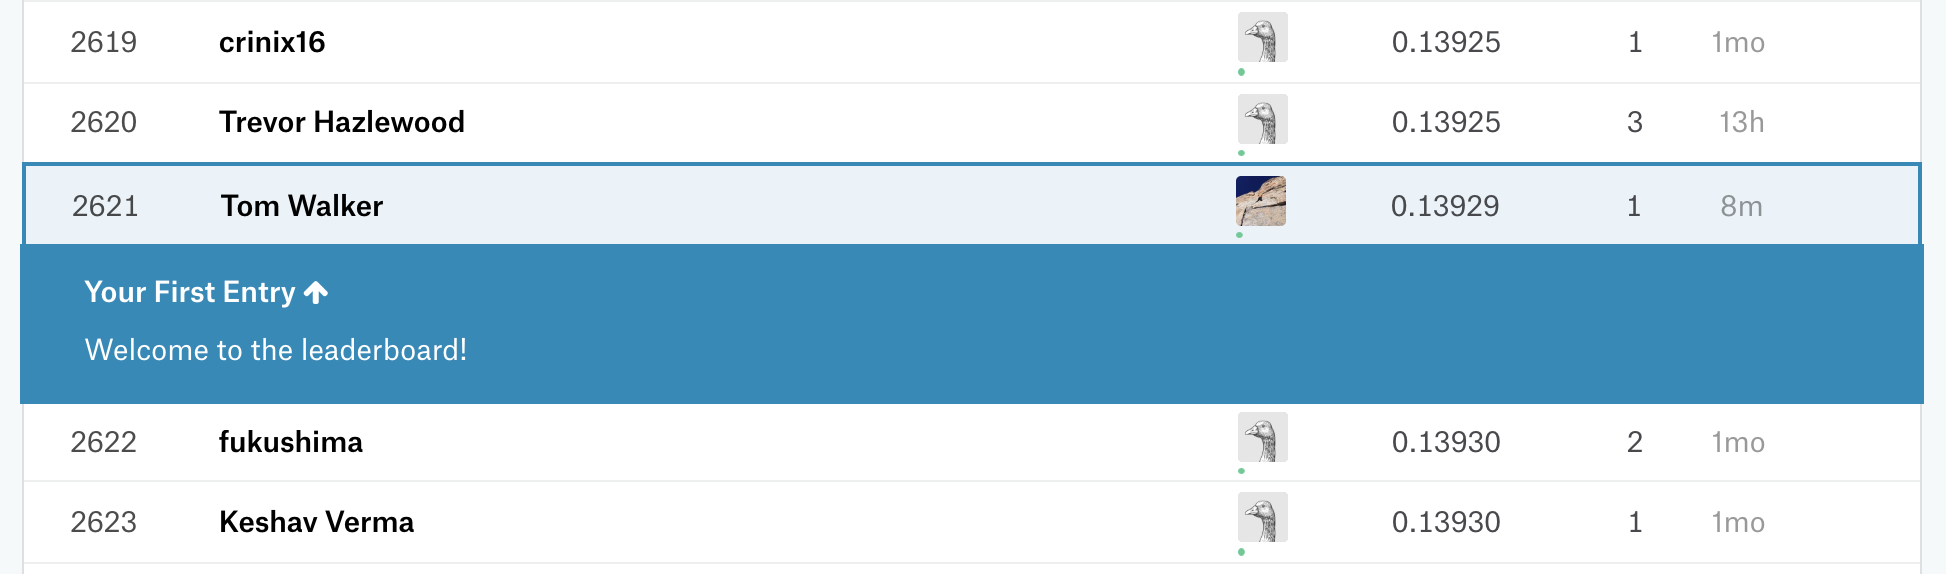